## Install requests-html using pip in google colab

In [1]:
pip install requests beautifulsoup4 requests-html


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.3 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=c9b9a435320d14a6aa6eef4758d0cb1b5efc0aaab596480c5137a8ed96d92d8d
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


In [2]:
#import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urlparse
import numpy as np
import nltk.data
from requests_html import HTMLSession

In [3]:
def get_and_parse(url):
  response = requests.get(url)

# Parse the HTML content with Beautiful Soup
  soup = BeautifulSoup(response.content, 'html.parser')

# Remove unwanted elements (script, style, comments, etc.)
  for element in soup(['script', 'style', 'comment']):
      element.extract()

# Extract the visible text
  text = soup.get_text(separator=' ')
  return text

In [4]:
def parse_elements(url,element):
    session = HTMLSession()
    r = session.get(url)
    elements = r.html.find(element)
    return elements

In [5]:
#Below we parse the paragraph elements and anchor elements from this article
url = 'https://www.statista.com/chart/30841/average-life-expectancy-gains-if-air-pollution-rules-met/'
paragraphs = parse_elements(url, 'p')
links = parse_elements(url, 'a')

In [6]:
#sentiment detection flags sentiment, approach is solely based on whether or not key words have been found in the article
def sentiment_detection(sentence):
    positive_words = ('reduced', 'extended','improvement', 'improve','accomodating','thanks','lower','reductions in pollution', 'positive')
    negative_words = ('worse', 'losing', 'worst', 'waste burning', 'mining', 'critical','cement manufacturing','offenders','cut short','inconveniencing','dangerous','wildfires', 'polluted','stark', 'most polluted')

    positive = any(sentence.count(i) > 0 for i in positive_words)
    negative = any(sentence.count(i) > 0 for i in negative_words)

    if positive == negative == False:
        return "neutral"
    elif positive != negative:
        return "positive" if positive else "negative"
    else:
        return "mixed"

In [7]:
#requirements: print out a topic analysis after every paragraph prints out
#dictionary that has two lists, one for the paragraphs, and one for topics covered by those paragraphs
#print(paragraphs)
p_dictionary = {}
p_list = []
sentiment_list = []
for p in range(0, len(paragraphs)):
    if len(paragraphs[p].text) > 50:
      #print((paragraphs[p].text))
      #print(f"TALKS ABOUT: {topic_detection(paragraphs[p].text)}")
      p_list.append(paragraphs[p].text)
      sentiment_list.append(sentiment_detection(paragraphs[p].text))
p_dictionary['Paragraphs'] = p_list
p_dictionary['Sentiments'] = sentiment_list

In [8]:
for p in paragraphs:
  print(p.text)

Industry Overview
Digital & Trend reports
Overview and forecasts on trending topics
Industry & Market reports
Industry and market insights and forecasts
Companies & Products reports
Key figures and rankings about companies and products
Consumer & Brand reports
Consumer and brand insights and preferences in various industries
Politics & Society reports
Detailed information about political and social topics
Country & Region reports
All key figures about countries and regions
Market forecast and expert KPIs for 1000+ markets in 190+ countries & territories
Insights on consumer attitudes and behavior worldwide
Business information on 70m+ public and private companies
Explore Company Insights
Detailed information for 39,000+ online stores and marketplaces
Directly accessible data for 170 industries from 150+ countries and over 1 Mio. facts.
Customized Research & Analysis projects:
Get quick analyses with our professional research service
The best of the best: the portal for top lists & rank

In [16]:
for a in links:
  print(a.text)

Skip to main content
Statista Logo

Statista Logo

statista.es
statista.de
statista.fr
Prices & Access
Single Accounts
Business Solutions
Academia and Government
Statistics
All Industries
Consumer Goods & FMCG
Internet
Media & Advertising
Retail & Trade
Sports & Recreation
Technology & Telecommunications
Transportation & Logistics
Travel, Tourism & Hospitality
Recent Statistics
Popular Statistics
Facebook: quarterly number of MAU (monthly active users) worldwide 2008-2023
Quarterly smartphone market share worldwide by vendor 2009-2023
Number of apps available in leading app stores Q3 2022
OPEC oil price annually 1960-2023
Big Mac index worldwide 2023
Topic Overview
Smartphones - statistics & facts
Social media - Statistics & Facts
View Report
Industry Overview
Reports
Report Shop
Search our report database
Digital & Trends
Digital & Trend reports
Overview and forecasts on trending topics
Industries & Markets
Industry & Market reports
Industry and market insights and forecasts
Companies

Data Analysis

In [15]:
#p_dictionary['Sentiments']

['neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'mixed',
 'positive',
 'negative',
 'mixed',
 'negative',
 'mixed',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral']

In [17]:
air_df = pd.DataFrame(p_dictionary)

In [18]:
air_df['Character Count'] = air_df['Paragraphs'].apply(lambda x: len(x))

In [19]:
air_df

,Paragraphs,Sentiments,Character Count
0,Key figures and rankings about companies and p...,neutral,53
1,Consumer and brand insights and preferences in...,neutral,65
2,Detailed information about political and socia...,neutral,54
3,Market forecast and expert KPIs for 1000+ mark...,neutral,81
4,Insights on consumer attitudes and behavior wo...,neutral,53
5,Business information on 70m+ public and privat...,neutral,57
6,"Detailed information for 39,000+ online stores...",neutral,63
7,Directly accessible data for 170 industries fr...,neutral,86
8,Get quick analyses with our professional resea...,neutral,57
9,The best of the best: the portal for top lists...,neutral,58


In [22]:
air_df['positive'] = air_df['Sentiments'].apply(lambda x:1 if 'positive' in x else 0)

In [23]:
air_df['negative'] = air_df['Sentiments'].apply(lambda x:1 if 'negative' in x else 0)

In [24]:
air_df['mixed'] = air_df['Sentiments'].apply(lambda x:1 if 'mixed' in x else 0)

In [25]:
air_df['neutral'] = air_df['Sentiments'].apply(lambda x:1 if 'neutral' in x else 0)

In [26]:
air_df

,Paragraphs,Sentiments,Character Count,positive,negative,mixed,neutral
0,Key figures and rankings about companies and p...,neutral,53,0,0,0,1
1,Consumer and brand insights and preferences in...,neutral,65,0,0,0,1
2,Detailed information about political and socia...,neutral,54,0,0,0,1
3,Market forecast and expert KPIs for 1000+ mark...,neutral,81,0,0,0,1
4,Insights on consumer attitudes and behavior wo...,neutral,53,0,0,0,1
5,Business information on 70m+ public and privat...,neutral,57,0,0,0,1
6,"Detailed information for 39,000+ online stores...",neutral,63,0,0,0,1
7,Directly accessible data for 170 industries fr...,neutral,86,0,0,0,1
8,Get quick analyses with our professional resea...,neutral,57,0,0,0,1
9,The best of the best: the portal for top lists...,neutral,58,0,0,0,1


In [27]:
#displaying total count of each sentiment
S_count = air_df['Sentiments'].value_counts()
print(S_count)
print(list(S_count))
print(list(S_count.keys()))

neutral     17
mixed        3
negative     2
positive     1
Name: Sentiments, dtype: int64
[17, 3, 2, 1]
['neutral', 'mixed', 'negative', 'positive']


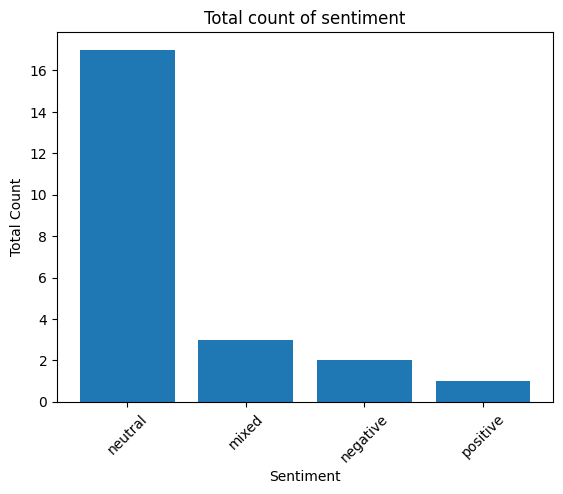

In [28]:
#Bar chart to show the  total count of sentiments
import matplotlib.pyplot as plt

# Plotting the bar graph
plt.bar(list(S_count.keys()), list(S_count))

# Customize the plot
plt.xlabel('Sentiment')
plt.ylabel('Total Count')
plt.title('Total count of sentiment')
plt.xticks(rotation=45)

# Show the plot
plt.show()


Next is the code for scraping an image from the article in order to display

In [29]:
#imported libraries for saving and display an image in google colab from the article
import requests
import os

In [30]:
#Url of the image you want to download
image_url='http://cdn.statcdn.com/Infographic/images/normal/30841.jpeg'

In [31]:
#send an HTTP GET request  to the image URL
response= requests.get(image_url)

In [32]:
#check if the request was successful (status code 200)
if response.status_code==200:
  #get the content of the image
  image_data=response.content
  #define the directory where you want to save the image
  save_directory = 'airpollution\images'
  #create the directory if it doesn't exist
  if not os.path.exists(save_directory):
    os.makedirs(save_directory)
    #construct the file path to save the image
    image_filename = os.path.join(save_directory, 'image.jpeg')
    #save the image to the file
    with open(image_filename, 'wb') as file:
      file.write(image_data)
      print(f'Image save to {image_filename}')
else:
  print('Failed to download the image.')

Image save to airpollution\images/image.jpeg


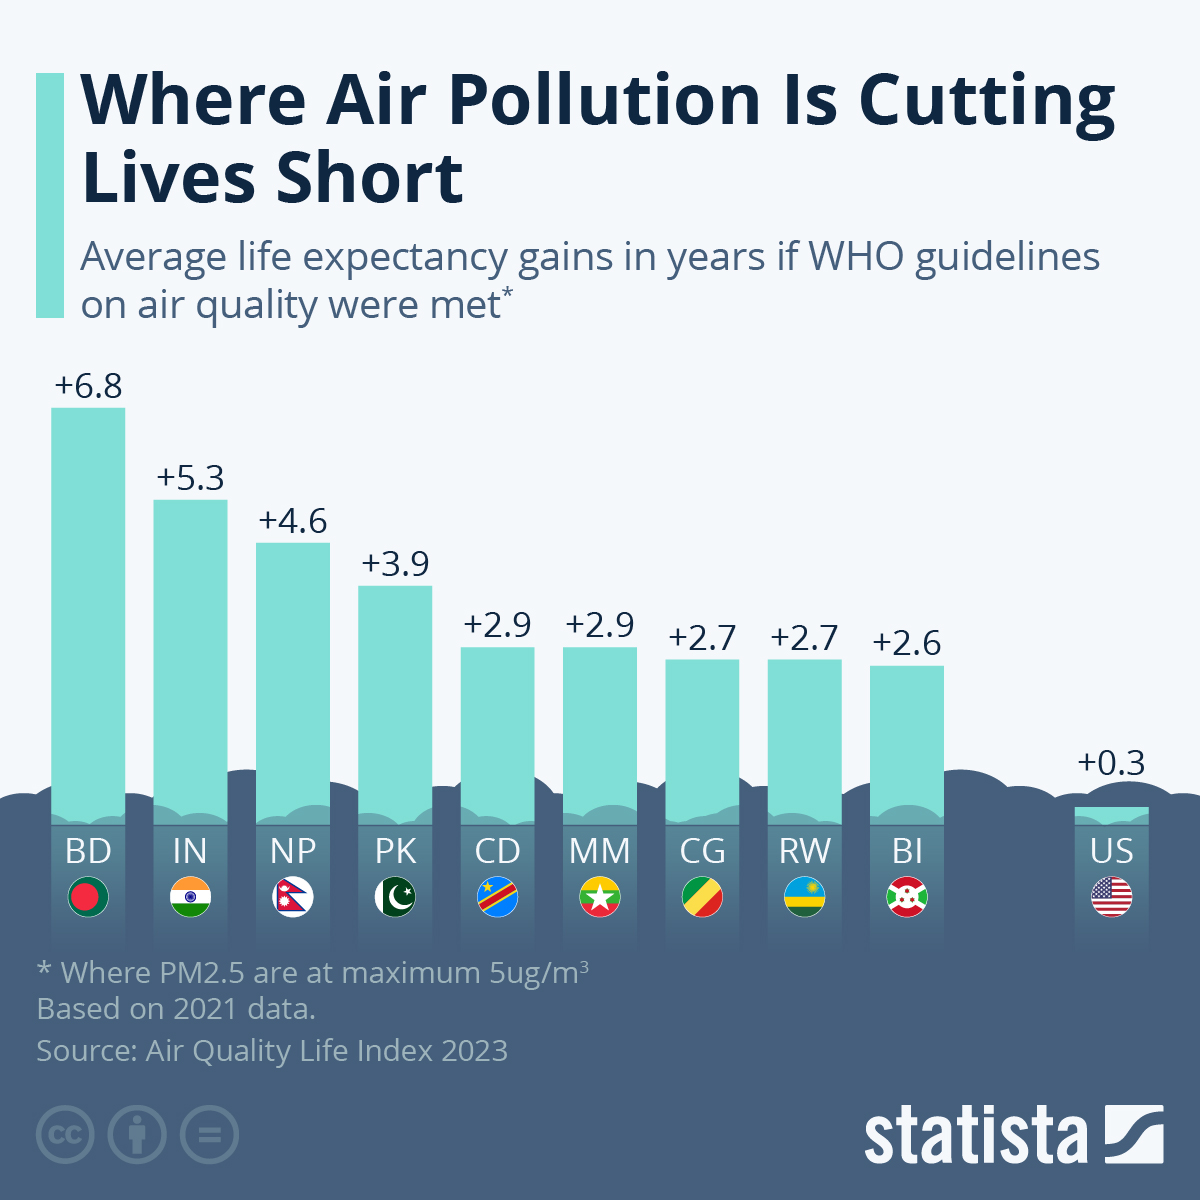

In [33]:
#display the image from the saved directory created in google colab
from IPython.display import Image, display
display(Image('/content/airpollution\images/image.jpeg',width=700, height=700))

In [34]:
#export data
air_df.to_csv('Life_expectency_gains&_Air_pollution.csv', index=False)